## Neural Network Modelling for NER by letting the model learn the embeddings on its own

#### Input Files:
#### Corpus_Sentences, Corpus_Sentences_Tags Corpus_POS_Tags
#### Output Files:
#### Corpus_Sentences_Test, Corpus_Sentences_Tags_Test, Corpus_POS_Tags_Test

In [1]:
import numpy as np
import pandas as pd
import csv

In [2]:
# Reading required Files
list_of_sent_tags = list()
list_of_sent_POS_tags = list()
list_of_sent_words = list()
with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_Sentences.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_words.append(row)

with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_Sentences_Tags.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_tags.append(row)
    
with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_POS_Tags.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_POS_tags.append(row)

In [3]:
list_of_sent_tags_test = list()
list_of_sent_POS_tags_test = list()
list_of_sent_words_test = list()
with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_Sentences_Test.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_words_test.append(row)

with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_Sentences_Tags_Test.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_tags_test.append(row)
    
with open("C:\\Project_NLP_Final\\Project Dataset\\PreProcessing\\Regex\\Corpus_POS_Tags_Test.csv","r", encoding="utf8") as csv_file:
    csv_file = csv.reader(csv_file, delimiter=',', quotechar = '"')
    for row in csv_file:
        list_of_sent_POS_tags_test.append(row)

In [4]:
new_sent_tags = list_of_sent_tags + list_of_sent_tags_test

In [5]:
new_sent_words = list_of_sent_words + list_of_sent_words_test

In [6]:
new_sent_POS_tags = list_of_sent_POS_tags + list_of_sent_POS_tags_test

In [7]:
req_list_test = [["Sentence: " + str(i + 1), word, POS, tag] for i, (sent, POS_sent, tag_sent) in enumerate(zip(list_of_sent_words_test, list_of_sent_POS_tags_test, list_of_sent_tags_test)) for word, POS, tag in zip(sent, POS_sent, tag_sent)]
data_test = pd.DataFrame(req_list_test, columns = ["Sentence #", "Word", "POS", "Tag"])
data_test.tail(20)

,Sentence #,Word,POS,Tag
130083,Sentence: 8708,me,PRP,O
130084,Sentence: 8708,if,IN,O
130085,Sentence: 8708,the,DT,O
130086,Sentence: 8708,pain,NN,B-SSLIF
130087,Sentence: 8708,worsens,NNS,O
130088,Sentence: 8708,in,IN,O
130089,Sentence: 8708,the,DT,O
130090,Sentence: 8708,interim,NN,O
130091,Sentence: 8708,.,.,O
130092,Sentence: 8709,electronically,RB,O


In [8]:
req_list_train = [["Sentence: " + str(i + 1), word, POS, tag] for i, (sent, POS_sent, tag_sent) in enumerate(zip(list_of_sent_words, list_of_sent_POS_tags, list_of_sent_tags)) for word, POS, tag in zip(sent, POS_sent, tag_sent)]
data_train = pd.DataFrame(req_list_train, columns = ["Sentence #", "Word", "POS", "Tag"])
data_train.tail(20)

,Sentence #,Word,POS,Tag
730447,Sentence: 51972,signed,NNP,O
730448,Sentence: 51972,by,IN,O
730449,Sentence: 51972,name,NNP,O
730450,Sentence: 51972,name,NNP,O
730451,Sentence: 51972,name,NNP,O
730452,Sentence: 51972,",",",",O
730453,Sentence: 51972,md,NNP,O
730454,Sentence: 51972,date,NNP,O
730455,Sentence: 51972,14,CD,O
730456,Sentence: 51972,38,CD,O


In [9]:
req_list = [["Sentence: " + str(i + 1), word, POS, tag] for i, (sent, POS_sent, tag_sent) in enumerate(zip(new_sent_words, new_sent_POS_tags, new_sent_tags)) for word, POS, tag in zip(sent, POS_sent, tag_sent)]
data = pd.DataFrame(req_list, columns = ["Sentence #", "Word", "POS", "Tag"])
data.tail(20)

,Sentence #,Word,POS,Tag
860550,Sentence: 60680,me,PRP,O
860551,Sentence: 60680,if,IN,O
860552,Sentence: 60680,the,DT,O
860553,Sentence: 60680,pain,NN,B-SSLIF
860554,Sentence: 60680,worsens,NNS,O
860555,Sentence: 60680,in,IN,O
860556,Sentence: 60680,the,DT,O
860557,Sentence: 60680,interim,NN,O
860558,Sentence: 60680,.,.,O
860559,Sentence: 60681,electronically,RB,O


In [10]:
words = list(set(data["Word"].values))
words = sorted(words)
words.append("ENDPAD")
n_words = len(words); n_words

14566

In [11]:
words_tr = list(set(data_train["Word"].values))
words_tr = sorted(words_tr)
words_tr.append("ENDPAD")
n_words_tr = len(words_tr); n_words_tr

13455

In [12]:
words_te = list(set(data_test["Word"].values))
words_te = sorted(words_te)
words_te.append("ENDPAD")
n_words_te = len(words_te); n_words_te

6687

In [13]:
tags_test = list(set(data_test["Tag"].values))
tags_test = sorted(tags_test)
n_tags_test = len(tags_test); n_tags_test

21

In [14]:
tags = list(set(data["Tag"].values))
tags = sorted(tags)
n_tags = len(tags); n_tags

21

In [15]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [16]:
getter = SentenceGetter(data_train)

In [17]:
getter_test = SentenceGetter(data_test)

In [18]:
sent = getter.get_next()

In [20]:
sentences = getter.sentences

In [21]:
sentences_test = getter_test.sentences

In [22]:
max_len = 75
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [24]:
word2idx["vicodin"]

14170

In [25]:
tag2idx["B-Drug"]

2

In [26]:
# Getting the training and testing data
from keras.preprocessing.sequence import pad_sequences
X_te = [[word2idx[w[0]] for w in s] for s in sentences_test]
X_tr = [[word2idx[w[0]] for w in s] for s in sentences]

Using TensorFlow backend.


In [27]:
X_te = pad_sequences(maxlen=max_len, sequences=X_te, padding="post", value=n_words)
X_tr = pad_sequences(maxlen=max_len, sequences=X_tr, padding="post", value=n_words)

In [28]:
y_te = [[tag2idx[w[2]] for w in s] for s in sentences_test]
y_tr = [[tag2idx[w[2]] for w in s] for s in sentences]

In [29]:
y_te = pad_sequences(maxlen=max_len, sequences=y_te, padding="post", value=tag2idx["O"])
y_tr = pad_sequences(maxlen=max_len, sequences=y_tr, padding="post", value=tag2idx["O"])

In [30]:
from keras.utils import to_categorical

In [31]:
# Need to do this step for CRF
y_te = [to_categorical(i, num_classes=n_tags) for i in y_te]
y_tr = [to_categorical(i, num_classes=n_tags) for i in y_tr]

In [32]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF

In [33]:
# Neural Network Modelling
input = Input(shape=(max_len,))
model = Embedding(input_dim=n_words + 1, output_dim=100,
                  input_length=max_len, mask_zero=True)(input)  # 20-dim embedding
model = Bidirectional(LSTM(units=150, return_sequences=True,
                           recurrent_dropout=0.4))(model)  # variational biLSTM
model = TimeDistributed(Dense(50, activation="relu"))(model)  # a dense layer as suggested by neuralNer
crf = CRF(n_tags)  # CRF layer
out = crf(model)  # output

In [34]:
model = Model(input, out)

In [35]:
model.compile(optimizer="adam", loss=crf.loss_function, metrics=[crf.accuracy])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 100)           1456700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 75, 300)           301200    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 75, 50)            15050     
_________________________________________________________________
crf_1 (CRF)                  (None, 75, 21)            1554      
Total params: 1,774,504
Trainable params: 1,774,504
Non-trainable params: 0
_________________________________________________________________


In [37]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger("C:\\Project_NLP_Final\\Project Dataset\\Saved Models\Word Embedding Self Learn Regex\\training_log_Embed.log", separator=',', append=False)
history = model.fit(X_tr, np.array(y_tr), batch_size=31, epochs=8,
                    validation_split=0.2, verbose=1, callbacks=[csv_logger])

Train on 41577 samples, validate on 10395 samples
Epoch 1/8
41577/41577 [==============================] - 1071s 26ms/step - loss: 0.0923 - acc: 0.9762 - val_loss: 0.0427 - val_acc: 0.9860
Epoch 2/8
41577/41577 [==============================] - 987s 24ms/step - loss: 0.0248 - acc: 0.9906 - val_loss: 0.0271 - val_acc: 0.9891
Epoch 3/8
41577/41577 [==============================] - 968s 23ms/step - loss: 0.0153 - acc: 0.9929 - val_loss: 0.0232 - val_acc: 0.9897
Epoch 4/8
41577/41577 [==============================] - 1071s 26ms/step - loss: 0.0111 - acc: 0.9942 - val_loss: 0.0215 - val_acc: 0.9900
Epoch 5/8
41577/41577 [==============================] - 1082s 26ms/step - loss: 0.0087 - acc: 0.9950 - val_loss: 0.0199 - val_acc: 0.9903
Epoch 6/8
41577/41577 [==============================] - 1074s 26ms/step - loss: 0.0072 - acc: 0.9956 - val_loss: 0.0192 - val_acc: 0.9903
Epoch 7/8
41577/41577 [==============================] - 997s 24ms/step - loss: 0.0061 - acc: 0.9961 - val_loss: 0.019

In [38]:
import pandas as pd
# log_data = history.history
log_data = pd.read_csv("C:\\Project_NLP_Final\\Project Dataset\\Saved Models\Word Embedding Self Learn Regex\\training_log_Embed.log", sep=',', engine='python') 

In [39]:
from keras_contrib.utils import save_load_utils
save_load_utils.save_all_weights(model,"C:\\Project_NLP_Final\\Project Dataset\\Saved Models\Word Embedding Self Learn Regex\\NN_model_Word_Embed_Regex.h5")
#model.save("C:\\Project_NLP_Final\\Project Dataset\\Saved Models\Word Embedding Self Learn Regex\\NN_model_Word_Embed_Regex.h5")  # creates a HDF5 file 'my_model.h5'

In [153]:
from keras_contrib.utils import save_load_utils
# returns a compiled model
# identical to the previous one
#del model

#save_load_utils.load_all_weights(model,"C:\\Project_NLP_Final\\Project Dataset\\Saved Models\Word Embedding Self Learn Regex\\NN_model_Word_Embed_Regex.h5")
#model = load_model("C:\\Project_NLP_Final\\Project Dataset\\Saved Models\Word Embedding Self Learn Regex\\NN_model_Word_Embed_Regex.h5", custom_objects={'CRF':CRF})

In [40]:
hist = pd.DataFrame(log_data)

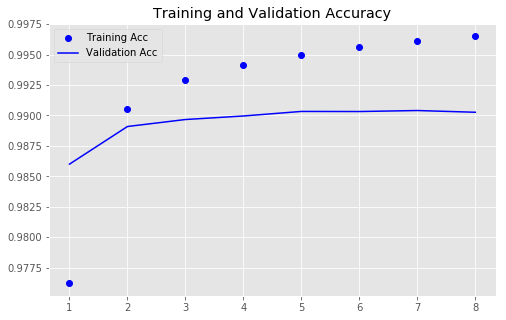

In [42]:
# Visualizing the Train-Validation Accuracy and Loss Curves
import matplotlib.pyplot as plt
acc = hist['acc']
val_acc = hist['val_acc']
epochs = range(1, len(acc) + 1)
plt.style.use("ggplot")
plt.figure(figsize=(8,5))
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

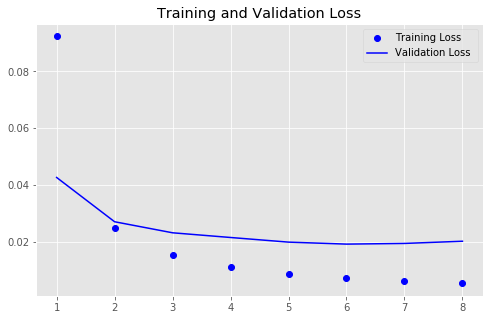

In [43]:
loss = hist['loss']
val_loss = hist['val_loss']
epochs = range(1, len(acc) + 1)
plt.style.use("ggplot")
plt.figure(figsize=(8,5))
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss ')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [44]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [45]:
# Predicting on the test data
test_pred = model.predict(X_te, verbose=1)

8709/8709 [==============================] - 52s 6ms/step


In [46]:
idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(y_te)
indices = [i for i, v in enumerate(pred_labels) if test_labels[i] != pred_labels[i]]

In [47]:
from sklearn.metrics import precision_recall_fscore_support

In [48]:
f1_score(test_labels, pred_labels, average='weighted')

0.7806292177549662

In [49]:
f1_score(test_labels, pred_labels, average='micro')

0.7806292177549662

In [50]:
f1_score(test_labels, pred_labels, average='macro')

0.7806292177549662

In [51]:
print(classification_report(test_labels, pred_labels))

             precision    recall  f1-score   support

      SSLIF       0.77      0.82      0.79      5076
 Indication       0.57      0.52      0.55       589
       Drug       0.87      0.82      0.85      2264
   Duration       0.74      0.77      0.76       132
   Severity       0.71      0.73      0.72       467
       Dose       0.82      0.83      0.83       699
  Frequency       0.86      0.82      0.84       591
        ADE       0.53      0.26      0.35       382
      Route       0.85      0.85      0.85       335
        PHI       0.16      0.32      0.21        25

avg / total       0.78      0.78      0.78     10560



In [52]:
print("Number of Test sentences: ", len(test_labels))
print("Number of Wrongly Classified sentences: ", len(indices))

Number of Test sentences:  8709
Number of Wrongly Classified sentences:  1932


In [1]:
# Saving data for error analysis
import nltk
csv_pl = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\Wrong Sentences.txt","w", encoding="utf8", newline='')

writer = csv.writer(csv_pl, delimiter=',', quotechar = '"')

for i in indices:
    sent = list()
    for w in X_te[i]:
        sent.append(words[w-1])
    pos_tag = [pos[1] for pos in nltk.pos_tag(sent)]
    p = model.predict(np.array([X_te[i]]))
    p = np.argmax(p, axis=-1)
    true = np.argmax(y_te[i], -1)
    writer.writerow([words[w-1] for w in X_te[i]])
    writer.writerow(pos_tag)
    writer.writerow([tags[t] for t in true])
    writer.writerow([tags[pred] for pred in p[0]])
    writer.writerow([])
csv_pl.close()

In [ ]:
csv_pl = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted Less.txt","a", encoding="utf8", newline='')
csv_pm = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted More.txt","a", encoding="utf8", newline='')
csv_w = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted Wrongly But Identified NE.txt","a", encoding="utf8", newline='')
csv_ml = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted More and Less.txt","a", encoding="utf8", newline='')
csv_mw = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted More and Wrongly.txt","a", encoding="utf8", newline='')
csv_lw = open("C:\\Project_NLP_Final\\Project Dataset\\Error Analysis\\System Predicted Less and Wrongly.txt","a", encoding="utf8", newline='')
writer_pl = csv.writer(csv_pl, delimiter=',', quotechar = '"')
writer_pm = csv.writer(csv_pm, delimiter=',', quotechar = '"')
writer_w = csv.writer(csv_w, delimiter=',', quotechar = '"')
writer_ml = csv.writer(csv_ml, delimiter=',', quotechar = '"')
writer_mw = csv.writer(csv_mw, delimiter=',', quotechar = '"')
writer_lw = csv.writer(csv_lw, delimiter=',', quotechar = '"')
count = 0
for i in indices:
    p = model.predict(np.array([X_te[i]]))
    p = np.argmax(p, axis=-1)
    sent = list()
    for w in X_te[i]:
        sent.append(words[w-1])
    pos_tag = [pos[1] for pos in nltk.pos_tag(sent)]
    true = np.argmax(y_te[i], -1)
    flag = 0
    #print(flag, count)
    for w, t, pred in zip(X_te[i], true, p[0]):
        if t == pred:
            continue
        if(t != pred and t == tag2idx['O'] and pred != tag2idx['O'] and flag == 0):
            # Predicted More
            flag = 1
        if(t != pred and t != tag2idx['O'] and pred == tag2idx['O'] and flag == 0):
            # Predicted Less
            flag = 2
        if(t != pred and t != tag2idx['O'] and pred != tag2idx['O'] and flag == 0):
            # Predicted Wrongly
            flag = 3
        if(t != pred and ((t != tag2idx['O'] and pred == tag2idx['O'] and flag == 1) or (t == tag2idx['O'] and pred != tag2idx['O'] and flag == 2))):
            # More and Less
            flag = 4
        if(t != pred and ((t == tag2idx['O'] and pred != tag2idx['O'] and flag == 3) or (t != tag2idx['O'] and pred != tag2idx['O'] and flag == 1))):
            # More and Wrongly
            flag = 5
        if(t != pred and ((t != tag2idx['O'] and pred == tag2idx['O'] and flag == 3) or (t != tag2idx['O'] and pred != tag2idx['O'] and flag == 2))):
            # Less and Wrongly
            flag = 6
    if flag == 1:
        count += 1
        writer_pm.writerow([words[w-1] for w in X_te[i]])
        writer_pm.writerow(pos_tag)
        writer_pm.writerow([tags[t] for t in true])
        writer_pm.writerow([tags[pred] for pred in p[0]])
        writer_pm.writerow([])
    elif flag == 2:
        count += 1
        writer_pl.writerow([words[w-1] for w in X_te[i]])
        writer_pl.writerow(pos_tag)
        writer_pl.writerow([tags[t] for t in true])
        writer_pl.writerow([tags[pred] for pred in p[0]])
        writer_pl.writerow([])
    elif flag == 3:
        count += 1
        writer_w.writerow([words[w-1] for w in X_te[i]])
        writer_w.writerow(pos_tag)
        writer_w.writerow([tags[t] for t in true])
        writer_w.writerow([tags[pred] for pred in p[0]])
        writer_w.writerow([])
    elif flag == 4:
        count += 1
        writer_ml.writerow([words[w-1] for w in X_te[i]])
        writer_ml.writerow(pos_tag)
        writer_ml.writerow([tags[t] for t in true])
        writer_ml.writerow([tags[pred] for pred in p[0]])
        writer_ml.writerow([])
    elif flag == 5:
        count += 1
        writer_mw.writerow([words[w-1] for w in X_te[i]])
        writer_mw.writerow(pos_tag)
        writer_mw.writerow([tags[t] for t in true])
        writer_mw.writerow([tags[pred] for pred in p[0]])
        writer_mw.writerow([])
    elif flag == 6:
        count += 1
        writer_lw.writerow([words[w-1] for w in X_te[i]])
        writer_lw.writerow(pos_tag)
        writer_lw.writerow([tags[t] for t in true])
        writer_lw.writerow([tags[pred] for pred in p[0]])
        writer_lw.writerow([])

csv_pl.close()
csv_pm.close()
csv_w.close()
csv_ml.close()
csv_mw.close()
csv_lw.close()